In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [17]:
train, test = tfds.load(
    name='imagenette/320px',
    split=['train', 'validation'],
    batch_size=64,
    as_supervised=True
)

In [18]:
train = train.map(
    lambda img, label: ((tf.image.resize(img, (227, 227))/255), label)
)
test = test.map(
    lambda img, label: ((tf.image.resize(img, (227, 227))/255), label)
)

In [19]:
print(train)
print(test)

<MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

In [20]:
history = model.fit(train, epochs=20, validation_data=test)

Epoch 1/20
202/202 [==============================] - 52s 240ms/step - loss: 3.0335 - accuracy: 0.1815 - val_loss: 2.4381 - val_accuracy: 0.1180
Epoch 2/20
202/202 [==============================] - 49s 239ms/step - loss: 2.1708 - accuracy: 0.2806 - val_loss: 2.5443 - val_accuracy: 0.1480
Epoch 3/20
202/202 [==============================] - 48s 237ms/step - loss: 1.9416 - accuracy: 0.3412 - val_loss: 1.6930 - val_accuracy: 0.4120
Epoch 4/20
202/202 [==============================] - 49s 242ms/step - loss: 1.7720 - accuracy: 0.3941 - val_loss: 1.6233 - val_accuracy: 0.4600
Epoch 5/20
202/202 [==============================] - 48s 236ms/step - loss: 1.6652 - accuracy: 0.4324 - val_loss: 1.5277 - val_accuracy: 0.5100
Epoch 6/20
202/202 [==============================] - 46s 227ms/step - loss: 1.5742 - accuracy: 0.4677 - val_loss: 1.6199 - val_accuracy: 0.4440
Epoch 7/20
202/202 [==============================] - 48s 235ms/step - loss: 1.5070 - accuracy: 0.4926 - val_loss: 1.8142 - val_ac

In [8]:
def graph(train_data, test_data, label):
    plt.plot(train_data, label=f'train {label}')
    plt.plot(test_data, label=f'test {label}')
    plt.title(f'Training & Validation {label}')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.grid()
    plt.legend()
    plt.show()

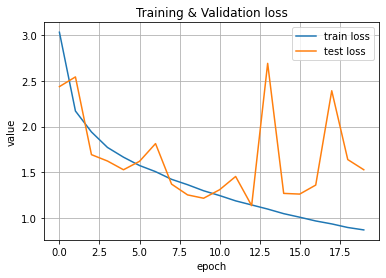

In [21]:
graph(history.history['loss'], history.history['val_loss'], 'loss')

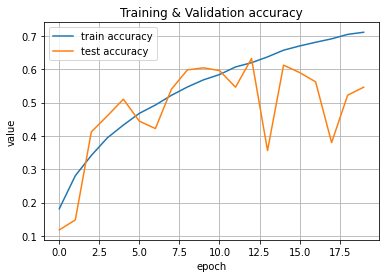

In [22]:
graph(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')